In [25]:
import pandas as pd
df = pd.read_csv("./csv/diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [26]:
df.isnull().sum().sum()

0

In [27]:
df['smoking_history'].value_counts()


No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

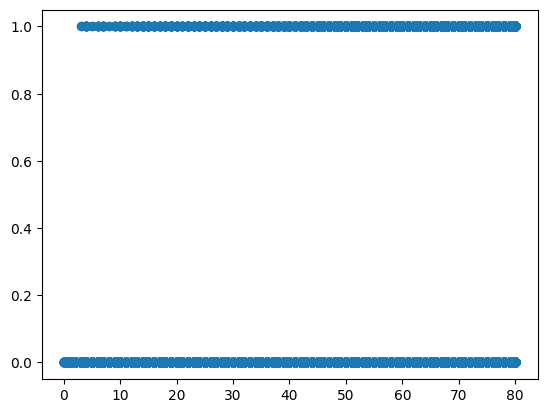

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['diabetes'])
# plt.xlabel('degree_t')
# plt.ylabel('status')
# plt.title('Scatter plot of degree_t vs. status')

In [29]:
df.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [30]:
df.groupby('diabetes').mean()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [31]:
X=df.drop('diabetes', axis=1)
y=df['diabetes']

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('', OneHotEncoder(sparse=False, drop='first'), ['gender','smoking_history'])], remainder = 'passthrough')
# Fitting and transforming the data using the ColumnTransformer
transformed_data = ct.fit_transform(X)

# Converting the transformed data back to a DataFrame
# Getting the feature names after transformation
feature_names = ct.get_feature_names_out()

df = pd.DataFrame(transformed_data,columns=feature_names)
X=df
X

,__gender_Male,__gender_Other,__smoking_history_current,__smoking_history_ever,__smoking_history_former,__smoking_history_never,__smoking_history_not current,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__bmi,remainder__HbA1c_level,remainder__blood_glucose_level
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,27.32,5.7,158.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,1.0,1.0,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,27.32,6.2,90.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,17.37,6.5,100.0
99997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,0.0,0.0,27.83,5.7,155.0
99998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0.0,0.0,35.42,4.0,100.0


In [33]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [35]:
scaler.transform(X)

array([[-8.41046203e-01, -1.34176155e-02, -3.19946365e-01, ...,
        -3.21055792e-01,  1.00170572e+00,  4.77042159e-02],
       [-8.41046203e-01, -1.34176155e-02, -3.19946365e-01, ...,
        -1.15583677e-04,  1.00170572e+00, -1.42620999e+00],
       [ 1.18899532e+00, -1.34176155e-02, -3.19946365e-01, ...,
        -1.15583677e-04,  1.61108022e-01,  4.89878478e-01],
       ...,
       [ 1.18899532e+00, -1.34176155e-02, -3.19946365e-01, ...,
         7.67292549e-02,  1.61108022e-01,  4.16182767e-01],
       [-8.41046203e-01, -1.34176155e-02, -3.19946365e-01, ...,
         1.22036126e+00, -1.42668764e+00, -9.34905254e-01],
       [-8.41046203e-01, -1.34176155e-02,  3.12552386e+00, ...,
        -7.36921977e-01,  1.00170572e+00, -1.18055762e+00]])

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
X_test.shape

(20000, 13)

In [39]:
from sklearn import svm

In [40]:
classifier = svm.SVC()

In [41]:
classifier.fit(X_train, y_train)

SVC()

In [47]:
# classifier.predict(X_test)
classifier.predict([[50,166,72,19,1,25.8,0.587,1,0,12,1,1,13]])

c:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [48]:
classifier.score(X_test,y_test)

0.947

In [ ]:
classifier.score(X_train,y_train)

0.9479375

In [ ]:
# rfc.predict(X_test)

In [ ]:
# model.predict(X_test)
# rfc.predict([[1,0,1,0,1,1,0,80,1,1,27.12,4.3,140]])

In [ ]:
# rfc.score(X_test,y_test)